#Introduction & Background 


Sign language is a form of communication used primarily by individuals who are unable to produce audible speech for communication. It is also used regularly by people who have to interact with hearing or speech impaired people on a regular basis. 

In situations where options for writing are either not available or are impractical, efforts to communicate by people who use sign language to people who do not understand sign language can become extremely emotionally distressing. 

Currently, the majority of people in developed countries have mobile phones which are equiped with a camera and are powerful enough to house applications which run machine learning models. This presents opportunities to develop a mobile application that could translate sign language into text or speech.

Having an application that could translate sign language into either text or speech would be akin to how Google translate is used to help bridge language challenges. 

The first step towards this however is to develop a model that is able to translate simple static signs, such as those used for spelling out the alphabet.

In this study, we will explore the use of CNNs and DNNs for the development of a model for categorising hand signs used for spelling letters in the alphabet.

#Method Description 


For this study, we will be testing two different types of neural networks and the impact of different hyperparameters on model performance. The neural networks we will testing are a Dense Neural Network (DNN) and a Convolutional Neural Network (CNN) to classify letters shown in sign language. 

The hyperparameters we will focus on in this study are hidden sizes, learning rate, activation functions and optimizers. The dataset comes from the Sign Language MNIST dataset.

**Dataset**

The training and test sets consists of 27455 and 7172 images respectively, which each representing a letter in the alphabet (A to Z). Each image is in grayscale with a dimension of 28x28 pixels. For training, validation and testing, we will use the full training set for training and split the test set equally to create a test and validation set.

**CNN Model**

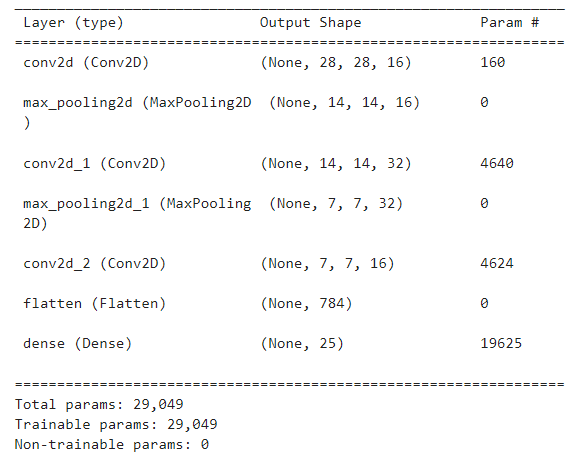

The CNN model consists of 3 Conv2D layers, 2 MaxPool2D layers, a flatten layer and a final dense layer.  

**Dense Model**

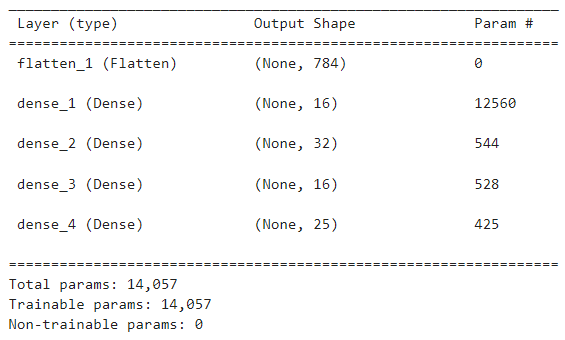

The DNN model which consists of 1 flatten layer and 4 dense layers. 

**Layer Description**

Below is a summary describing the purpose of each layer :

* **Conv2D** : This layer is used to enhance certain features of an image by applying a convolutional filter which will either increase or decrease the value of individual pixels.
* **MaxPool2D** : Max pooling is used to down-sample the input image to reduce its pixel dimensions which helps reduce the number of parameters in the model.
* **Flatten** : A Flatten layer converts the 2D image to a 1D vector.
* **Dense** : Dense layers are the standard deeply connected neural network layer 


**Hyperparameter Description**

Hyperparameters are parameters that can be configured to guide the training process. How hyperparameters are setup will influence the values of the model parameters, which in turn determines the models performance. 


**Experiment**

In total, we will perform 8 experiments after which we will select the best performing hyperparameters and model to train an optimised model and assess its performance on the test set.

The experiments will be broken down as follows :
* Experiment 1-1 : CNN Model - hiddensizes
* Experiment 1-2 : CNN Model - learning rate
* Experiment 1-3 : CNN Model - activation function
* Experiment 1-4 : CNN Model - optimizer
* Experiment 2-1 : DNN Model - hiddensizes
* Experiment 2-2 : DNN Model - learning rate
* Experiment 2-3 : DNN Model - activation function
* Experiment 2-4 : DNN Model - optimizer

**Approach**

In this study, we test the performance of two types of neural networks, DNN and CNN, for the classification of hand signs to letters of the alphabet. For each model, we will attempt to identify the best performing hyperparameters. The four hyperparameters we will test in this experiment are hidden sizes, learning rate, activation functions and optimizers. 

# Method Implementation (Code)

### 0. Initial Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras 

## 1. Load Data

In [ ]:
#Load training data
df_train=pd.read_csv("sign_mnist_train.csv")

#Load test data
df_test = pd.read_csv("sign_mnist_test.csv")


In [ ]:
df_train.describe()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [ ]:
df_test.describe()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

## 2. Explore Data

In [ ]:
#Change pd options so that all columns are shown
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#### Check for rows with Nan values

##### Training data

In [ ]:
df_train[df_train.isnull().any(axis=1)]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

##### Test data

In [ ]:
df_test[df_test.isnull().any(axis=1)]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

#### Check size and shape of datasets

##### Training

In [ ]:
print(df_train.shape)

(27455, 785)


##### Test

In [ ]:
print(df_test.shape)

(7172, 785)


#### Check data labels for outliers

##### Training

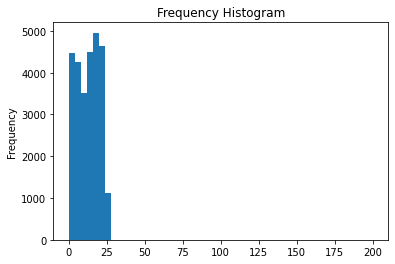

In [ ]:
plt.hist(df_train['label'], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

The training dataset appears to have a problem with one of the labels.

In [ ]:
df_train['label'].value_counts()

17     1294
16     1279
11     1241
22     1225
5      1204
18     1199
3      1196
14     1196
19     1186
23     1164
8      1162
20     1160
13     1151
2      1144
0      1126
24     1118
10     1114
6      1090
15     1088
21     1082
12     1055
7      1013
1      1010
4       957
200       1
Name: label, dtype: int64

In [ ]:
df_train.loc[df_train['label']==200]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

We can see that there is one label for '200' when the highest label should be '24'. We've identified that the sample with the faulty label is at index 498. In the next step we will retrieve the image to verify what it is and fix the label. 

##### Test

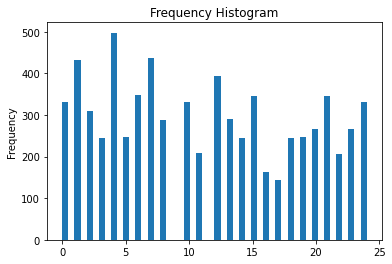

In [ ]:
plt.hist(df_test['label'], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
df_test['label'].value_counts()

4     498
7     436
1     432
12    394
6     348
15    347
21    346
24    332
0     331
10    331
2     310
13    291
8     288
23    267
20    266
19    248
5     247
14    246
18    246
3     245
11    209
22    206
16    164
17    144
Name: label, dtype: int64

#### Fix outlier in training data

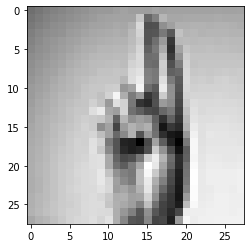

In [ ]:
import string

#List for converting label number to corresponding alphabet
alphabet = list(string.ascii_uppercase)

#Function to reshape row so can be viewed as an image
def to_image(array, label = True):
    # Reshape an array into an image format
    array = np.array(array)
    start_idx = 1 if label else 0
    return array[start_idx:].reshape(28,28).astype(float)

# Display one image
image = df_train.iloc[498]
img = to_image(image)
# plt.title(alphabet[image['label']])
plt.imshow(img, cmap = 'gray')
plt.show()

Above we can see that the image is showing the hand sign for the letter 'U', which is represented by the number 20. We will fix the label and replot the histogram to verify that there are no more outliers.

In [ ]:
df_train.loc[498]['label'] = 20

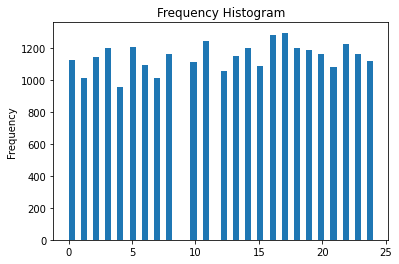

In [ ]:
plt.hist(df_train['label'], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

There do not appear to be outliers, however it looks like some letters may not be represented in the dataset. We will run a function to return which letters are missing.

In [ ]:
label_arr = df_train['label'].unique()

In [ ]:
alphabet_list = list(string.ascii_uppercase)

In [ ]:
def findMissingLetters(alphabet_list, label_array):

  for num_label in label_array:
    alphabet_list[num_label] = ''

  print(alphabet_list)

findMissingLetters(alphabet_list, label_arr)

['', '', '', '', '', '', '', '', '', 'J', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Z']


Above we can see that the missing letters are 'J' and 'Z', which make is understandable because these letters cannot be represented by static hand images. This represents a limitation of the model and should be communicated clearly when the model is deployed.

#### Display sample of training and test data

##### Training

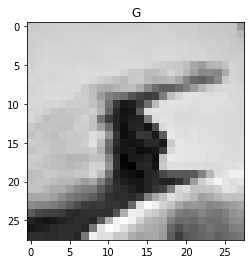

In [ ]:
training_sample_index = 33 # <--- Enter the index of the training sample you want to review

image = df_train.iloc[training_sample_index]
img = to_image(image)
plt.title(alphabet[image['label']])
plt.imshow(img, cmap = 'gray')
plt.show()

##### Test

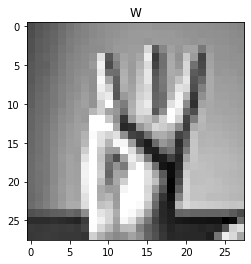

In [ ]:
test_sample_index = 400 # <--- Enter the index of the test sample you want to review

image = df_test.iloc[test_sample_index]
img = to_image(image)
plt.title(alphabet[image['label']])
plt.imshow(img, cmap = 'gray')
plt.show()

## 3. Prepare Training and Validation datasets

#### Split training set into training, test and validation

The test set is kept completely separate and is not used for training or validation to ensure there is no bias in the model. We use the test data only in the final step to verify the model performance after training and validation is complete.

In [ ]:
X_train = df_train.drop("label",axis=1).values
y_train = df_train['label'].values

X_test_full = df_test.drop("label",axis=1).values
y_test_full = df_test['label'].values

X_test, X_val,y_test,y_val = train_test_split(X_test_full,y_test_full, test_size=0.5, random_state=42, stratify=y_test_full)

#### Reshape the full test data

In [ ]:
X_test_full_temp = []

for i in enumerate(X_test_full):
  X_test_full_temp.append(X_test_full[i].reshape(28,28,1))

In [ ]:
#Normalize pixel values
X_test_full  = np.array(X_test_full_temp)/255

In [ ]:
#Verify new shape
X_test_full.shape

(7172, 28, 28, 1)

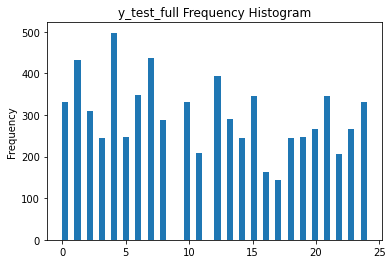

In [ ]:
#Check label distribution for y_test
df_y_test_full = pd.DataFrame(y_test_full)
plt.hist(df_y_test_full[0], bins=50)
plt.gca().set(title='y_test_full Frequency Histogram', ylabel='Frequency');

#### Reshape the training data

In [ ]:
X_train_temp = []

for i in enumerate(X_train):
  X_train_temp.append(X_train[i].reshape(28,28,1))

In [ ]:
#Normalize pixel values
X_train  = np.array(X_train_temp)/255

In [ ]:
#Verify new shape
X_train.shape

(27455, 28, 28, 1)

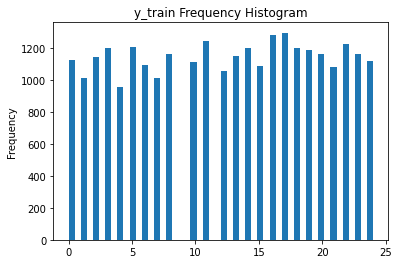

In [ ]:
#Check label distribution for y_test
df_y_train = pd.DataFrame(y_train)
plt.hist(df_y_train[0], bins=50)
plt.gca().set(title='y_train Frequency Histogram', ylabel='Frequency');

#### Reshape the validation data

In [ ]:
X_val_temp = []

for i in enumerate(X_val):
  X_val_temp.append(X_val[i].reshape(28,28,1))

In [ ]:
#Normalize pixel values
X_val = np.array(X_val_temp)/255

In [ ]:
#Verify new shape
X_val.shape

(3586, 28, 28, 1)

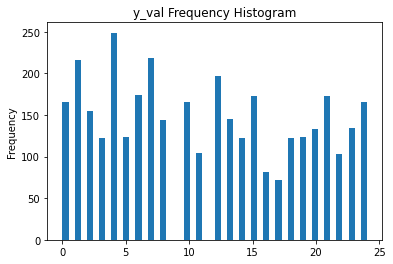

In [ ]:
#Check label distribution for y_val
df_y_val = pd.DataFrame(y_test)
plt.hist(df_y_val[0], bins=50)
plt.gca().set(title='y_val Frequency Histogram', ylabel='Frequency');

#### Reshape the test data

In [ ]:
X_test_temp = []

for i in enumerate(X_test):
  X_test_temp.append(X_test[i].reshape(28,28,1))

In [ ]:
#Normalize pixel values
X_test = np.array(X_test_temp)/255

In [ ]:
#Verify new shape
X_test.shape

(3586, 28, 28, 1)

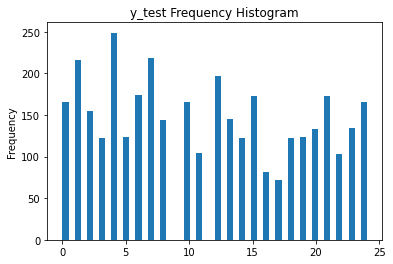

In [ ]:
#Check label distribution for y_test
df_y_test = pd.DataFrame(y_test)
plt.hist(df_y_test[0], bins=50)
plt.gca().set(title='y_test Frequency Histogram', ylabel='Frequency');

## 4. Build and Train the Initial Models

#### Setup early stopping callback

We setup the callback to stop 

In [ ]:
from keras.callbacks import EarlyStopping

early_stop_callback = EarlyStopping(monitor='val_loss',patience=5, min_delta=0.01, mode='auto', verbose=0,restore_best_weights=True)

#### CNN Model

##### Define CNN Parameters

We define the parameters here to make it easier to try different arguments

In [ ]:
# Define the number and size of hidden layers
hiddensizes = [16, 32, 16]
# Define the activation function to be used by hidden layers
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learning_rate = 0.01   # SGD default value
# Set size of batch and number of epochs
batch_size = 64
n_epochs = 50

##### Define CNN model

In [ ]:
def model_cnn_factory(hiddensizes,actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    # input layer goes into this 2D convolution
    model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
        model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
    model.add(keras.layers.Flatten())                          # unravel into a 1D vector
    model.add(keras.layers.Dense(25, activation = "softmax"))  # always have 25 classes
    model.summary()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learning_rate), metrics=["accuracy"])   

    return model


In [ ]:
def run_CNN(title,hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback):
  model = model_cnn_factory(hiddensizes, actfn, optimizer, learning_rate)

  #Fit the model
  # history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_val, y_val))
  history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_val, y_val),verbose=0, callbacks=[early_stop_callback])

  #Display the model summary
  pd.DataFrame(history.history).plot(title=title,figsize=(8, 5))

  #Print a summary of the final results
  print(f"Summary\n-----------\nepochs : {len(history.history['val_accuracy'])}\naccuracy : {history.history['accuracy'][-1]}\nloss : {history.history['loss'][-1]}\nval_accuracy : {history.history['val_accuracy'][-1]}\nval_loss : {history.history['val_loss'][-1]}\n")

  return history



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 784)               0

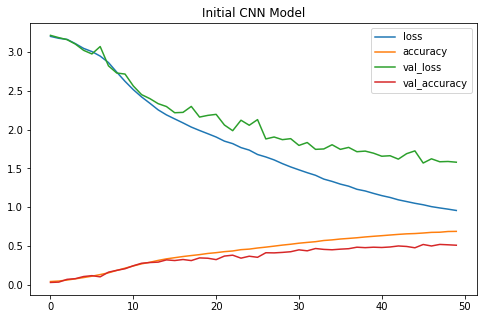

In [ ]:
run_CNN('Initial CNN Model',hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback)

#### Dense Model

##### Define Dense Parameters

We define the parameters here to make it easier to try different arguments

In [ ]:
# Define the number and size of hidden layers
hiddensizes = [16, 32, 16]
# Define the activation function to be used by hidden layers
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learning_rate = 0.01   # SGD default value
# Set size of batch and number of epochs
batch_size = 64
n_epochs = 50

##### Define Dense Model

In [ ]:
def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28, 28, 1]))    # always have same sized inputs
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
    model.add(keras.layers.Dense(25, activation = "softmax"))   # always have 25 classes
    model.summary()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learning_rate), metrics=["accuracy"])
    return model

In [ ]:
def run_Dense(title, hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback):
  #Define the model
  model = model_dense_factory(hiddensizes, actfn, optimizer, learning_rate)

  #Fit the model
  # history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_val, y_val))
  history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_val, y_val),verbose=0, callbacks=[early_stop_callback])

  #Display the model summary
  pd.DataFrame(history.history).plot(title=title,figsize=(8, 5))

  #Print a summary of the final results
  print(f"Summary\n-----------\nepochs : {len(history.history['val_accuracy'])}\naccuracy : {history.history['accuracy'][-1]}\nloss : {history.history['loss'][-1]}\nval_accuracy : {history.history['val_accuracy'][-1]}\nval_loss : {history.history['val_loss'][-1]}")

  return history



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                12560     
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 25)                425       
                                                                 
Total params: 14,057
Trainable params: 14,057
Non-trainable params: 0
_________________________________________________________________
Summary
-----------
epochs : 17
accuracy : 0.08646

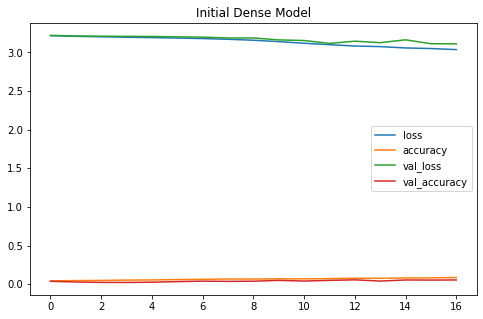

In [ ]:
run_Dense('Initial Dense Model',hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback)

## 5. Experiments to optimise CNN Model

##### Exp1 : CNN - Hidden sizes
We try 4 architecture types including the baseline, to see how a deeper, wider, or deeper and wider architecture perform

In [ ]:
def optimise_hiddensize_CNN():
  parameters = [ 
    [16,32,16], 
    [8,12,24,32],    
    [32,96,192],    
    [16,64,128,256],   
  ] #hidden sizes

  results_arr = []

  for param in parameters:
    # Define the number and size of hidden layers
    hiddensizes = param
    # Define the activation function to be used by hidden layers
    actfn = "relu"
    # Optimiser and learning rate
    optimizer = keras.optimizers.SGD
    learning_rate = 0.01   # SGD default value
    # Set size of batch and number of epochs
    batch_size = 64
    n_epochs = 50
    title = f'hiddensize (CNN) : {param}'

    history = run_CNN(title, hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback)

    results_arr.append([param,history.history['val_accuracy'][-1]])

    history_arr = []
    history_arr.append(history.history)
  
  val_accuracy_arr = []
  best_result = []

  print('All results')
  print('-----------')
  for result in results_arr:
    print(result)
    val_accuracy_arr.append(result[1])

  print(f'\nBest val_accuracy : {max(val_accuracy_arr)}' )

  for result in results_arr:
    if result[1] == max(val_accuracy_arr):
      best_result = result[0]

  print(f'\nBest result : {best_result}' )

  return history_arr

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 flatten_2 (Flatten)         (None, 784)              

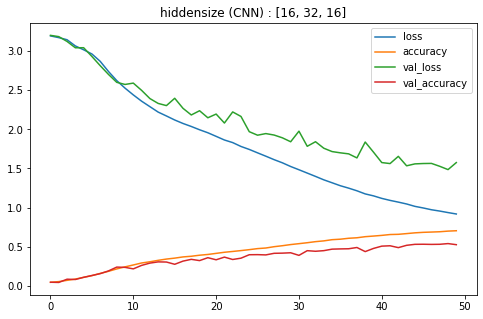

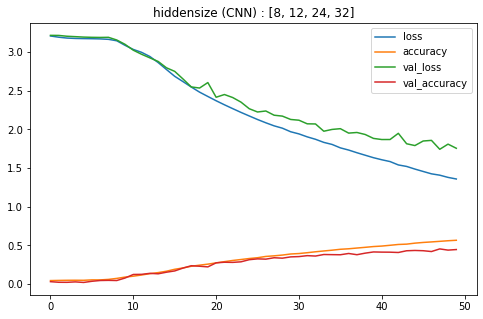

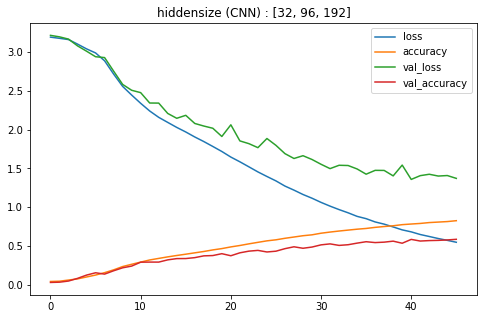

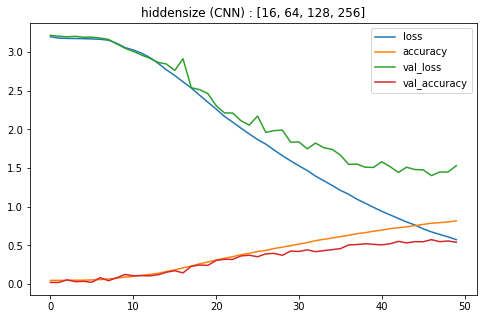

In [ ]:
history_arr = optimise_hiddensize_CNN()

##### Exp2 : CNN - Learning Rate

Different learning rates can impact how quickly a model can converge to a local minimum. Learning rates which are too small could take too long to converge, and rates which are too large could cause the model to never converge. Different rates can also impact the models ability to escape local minimums and converge on the global minimum. 

In [ ]:
def optimise_best_learning_rate_CNN():
  parameters = [0.1,0.05,0.01,0.001] #learning rates

  results_arr = []

  for param in parameters:
    hiddensizes = [16, 64, 128, 256]
    actfn = "relu"
    optimizer = keras.optimizers.SGD
    learning_rate = param  
    batch_size = 64
    n_epochs = 50
    title = f'learning rate (CNN) : {param}'

    history = run_CNN(title, hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback)

    results_arr.append([param,history.history['val_accuracy'][-1]])

    history_arr = []
    history_arr.append(history.history)
  
  val_accuracy_arr = []
  best_result = []

  print('All results')
  print('-----------')
  for result in results_arr:
    print(result)
    val_accuracy_arr.append(result[1])

  print(f'\nBest val_accuracy : {max(val_accuracy_arr)}' )

  for result in results_arr:
    if result[1] == max(val_accuracy_arr):
      best_result = result[0]

  print(f'\nBest result : {best_result}' )

  return history_arr


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 3, 3, 128)      

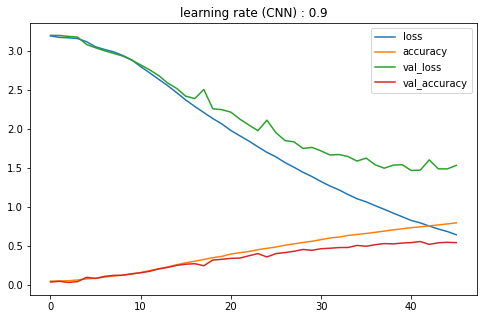

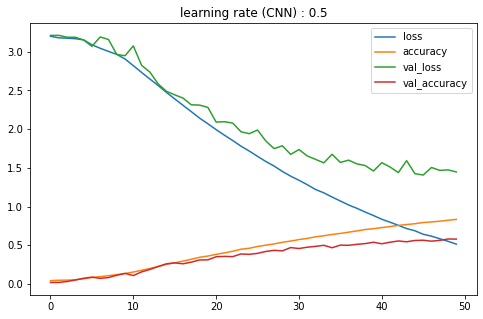

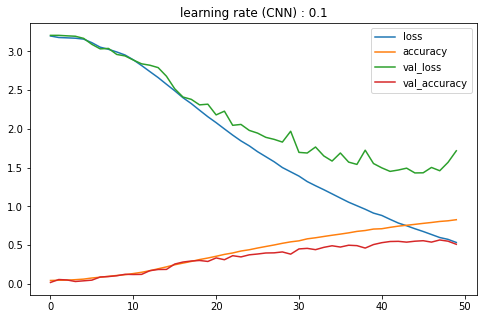

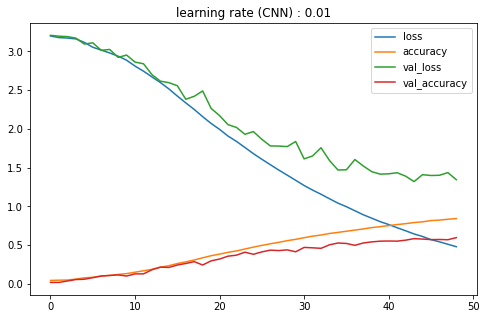

In [ ]:
history_arr = optimise_best_learning_rate_CNN()

##### Exp3 : CNN - Activation Function

Activation functions help with learning complex patterns in the data so we want to identify the best one for our model.

In [ ]:
def optimise_activation_function_CNN():
  parameters = ['elu', 'selu', 'relu', 'tanh', 'sigmoid'] #activation functions

  results_arr = []

  for param in parameters:
    hiddensizes = [16, 64, 128, 256]
    actfn = param
    optimizer = keras.optimizers.SGD
    learning_rate = 0.05 
    batch_size = 64
    n_epochs = 50
    title = f'Activation Function (CNN) : {param}'

    history = run_CNN(title, hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback)

    results_arr.append([param,history.history['val_accuracy'][-1]])

    history_arr = []
    history_arr.append(history.history)    
  
  val_accuracy_arr = []
  best_result = []

  print('All results')
  print('-----------')
  for result in results_arr:
    print(result)
    val_accuracy_arr.append(result[1])

  print(f'\nBest val_accuracy : {max(val_accuracy_arr)}' )

  for result in results_arr:
    if result[1] == max(val_accuracy_arr):
      best_result = result[0]

  print(f'\nBest result : {best_result}' )

  return history_arr


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 3, 3, 128)      

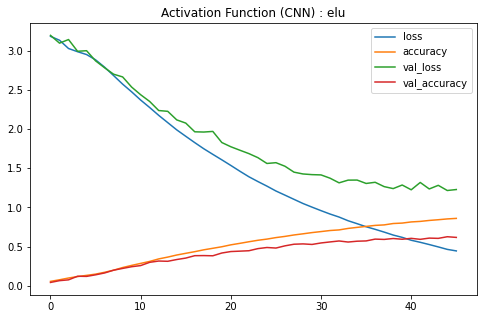

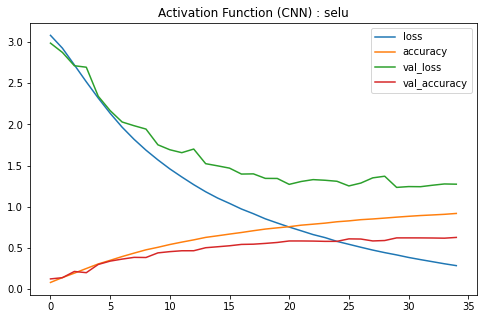

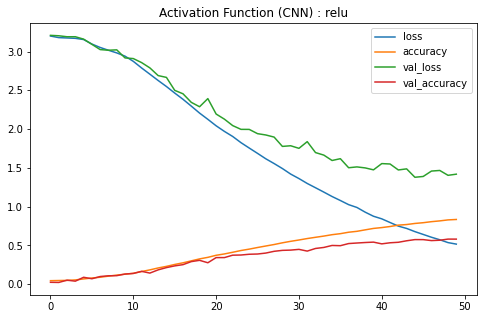

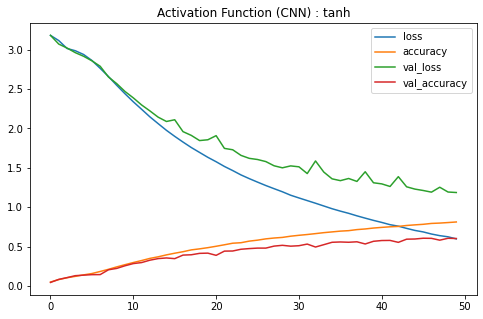

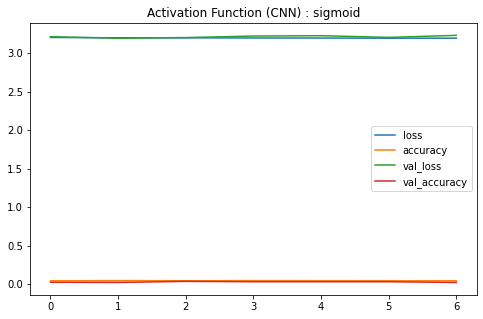

In [ ]:
history_arr = optimise_activation_function_CNN()

##### Exp4 : CNN - Optimizer

Optimizers help with improving accuracy and reducing the overall loss. They can modify attributes of the neural network which includes the weights and learning rate.

In [ ]:
def optimise_optimizer_CNN():
  parameters = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adam, keras.optimizers.Adamax, keras.optimizers.Nadam] #optimizers

  results_arr = []

  for param in parameters:
    hiddensizes = [16, 64, 128, 256]
    actfn = 'elu'
    optimizer = param
    learning_rate = 0.05 
    batch_size = 64
    n_epochs = 50
    title = f'Optimizer (CNN) : {param}'

    history = run_CNN(title, hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback)

    results_arr.append([param,history.history['val_accuracy'][-1]])

    history_arr = []
    history_arr.append(history.history)
  
  val_accuracy_arr = []
  best_result = []

  print('All results')
  print('-----------')
  for result in results_arr:
    print(result)
    val_accuracy_arr.append(result[1])

  print(f'\nBest val_accuracy : {max(val_accuracy_arr)}' )

  for result in results_arr:
    if result[1] == max(val_accuracy_arr):
      best_result = result[0]

  print(f'\nBest result : {best_result}' )

  return history_arr


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 3, 3, 128)      

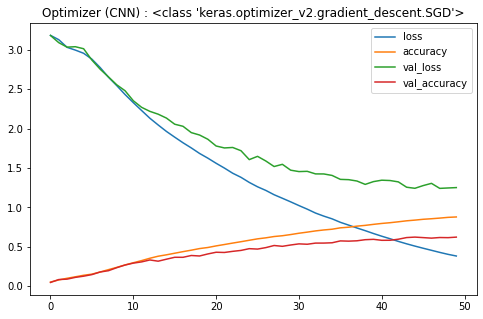

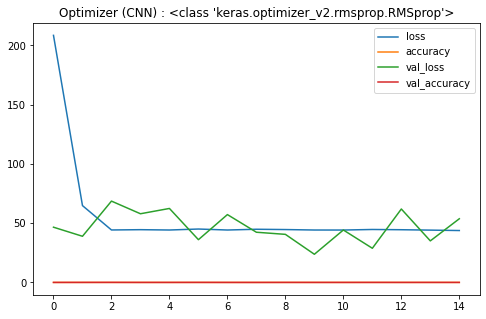

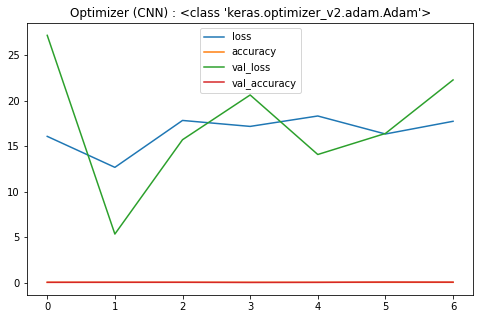

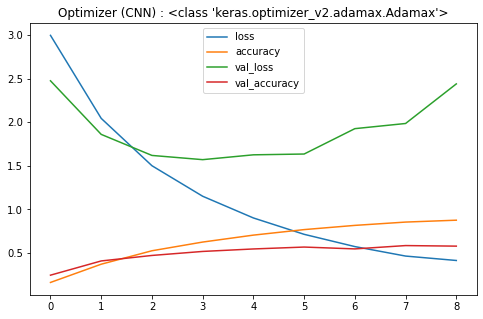

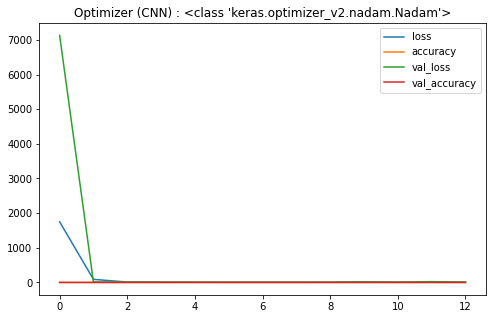

In [ ]:
history_arr = optimise_optimizer_CNN()

## 6. Experiments to optimise Dense Model

##### Exp5 : DNN - Hidden sizes

In [ ]:
def optimise_hiddensize_Dense():
  parameters = [ 
    [16,32,16], 
    [8,12,24,32],    
    [32,96,192],    
    [16,64,128,256],   
  ] #hidden sizes

  results_arr = []

  for param in parameters:
    # Define the number and size of hidden layers
    hiddensizes = param
    # Define the activation function to be used by hidden layers
    actfn = "relu"
    # Optimiser and learning rate
    optimizer = keras.optimizers.SGD
    learning_rate = 0.01   # SGD default value
    # Set size of batch and number of epochs
    batch_size = 64
    n_epochs = 50
    title = f'hiddensize (Dense) : {param}'

    history = run_Dense(title, hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback)

    results_arr.append([param,history.history['val_accuracy'][-1]])

    history_arr = []
    history_arr.append(history.history)
  
  val_accuracy_arr = []
  best_result = []

  print('All results')
  print('-----------')
  for result in results_arr:
    print(result)
    val_accuracy_arr.append(result[1])

  print(f'\nBest val_accuracy : {max(val_accuracy_arr)}' )

  for result in results_arr:
    if result[1] == max(val_accuracy_arr):
      best_result = result[0]

  print(f'\nBest result : {best_result}' )

  return history_arr

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 16)                12560     
                                                                 
 dense_24 (Dense)            (None, 32)                544       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 25)                425       
                                                                 
Total params: 14,057
Trainable params: 14,057
Non-trainable params: 0
_________________________________________________________________
Summary
-----------
epochs : 47
accuracy : 0.1427

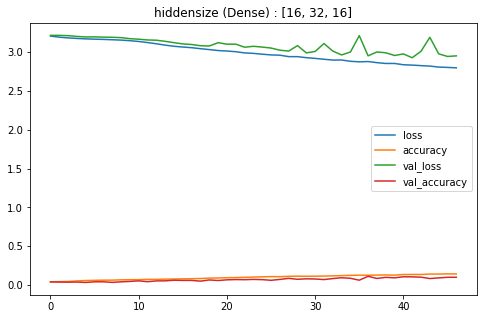

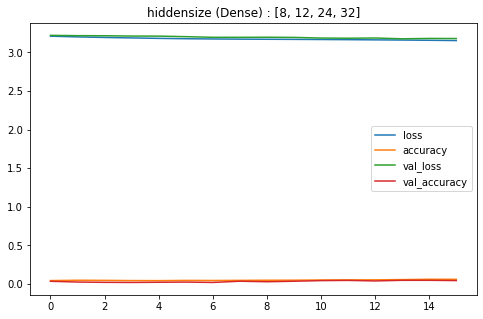

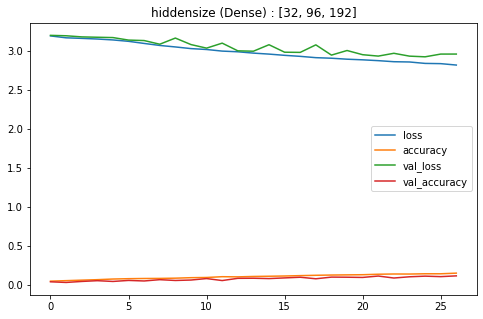

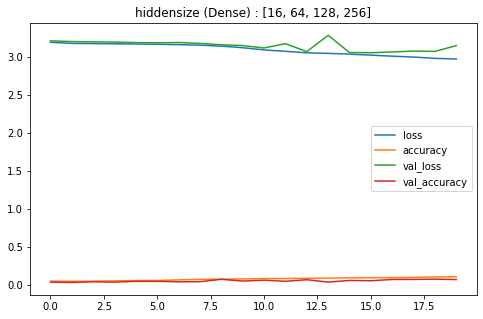

In [ ]:
history_arr = optimise_hiddensize_Dense()

##### Exp6 : DNN - Learning Rate

In [ ]:
def optimise_best_learning_rate_Dense():
  parameters = [0.1,0.05,0.01,0.001] #learning rates

  results_arr = []

  for param in parameters:
    hiddensizes = [16, 64, 128, 256]
    actfn = "relu"
    optimizer = keras.optimizers.SGD
    learning_rate = param  
    batch_size = 64
    n_epochs = 50
    title = f'learning rate (Dense) : {param}'

    history = run_Dense(title, hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback)

    results_arr.append([param,history.history['val_accuracy'][-1]])

    history_arr = []
    history_arr.append(history.history)
  
  val_accuracy_arr = []
  best_result = []

  print('All results')
  print('-----------')
  for result in results_arr:
    print(result)
    val_accuracy_arr.append(result[1])

  print(f'\nBest val_accuracy : {max(val_accuracy_arr)}' )

  for result in results_arr:
    if result[1] == max(val_accuracy_arr):
      best_result = result[0]

  print(f'\nBest result : {best_result}' )

  return history_arr


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 16)                12560     
                                                                 
 dense_42 (Dense)            (None, 64)                1088      
                                                                 
 dense_43 (Dense)            (None, 128)               8320      
                                                                 
 dense_44 (Dense)            (None, 256)               33024     
                                                                 
 dense_45 (Dense)            (None, 25)                6425      
                                                                 
Total params: 61,417
Trainable params: 61,417
Non-tra

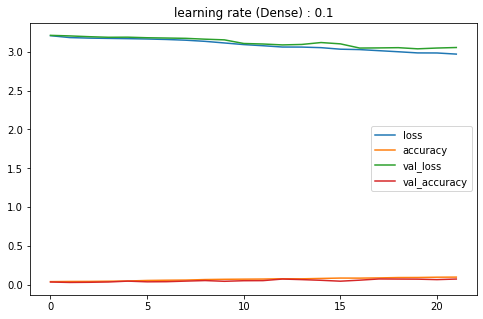

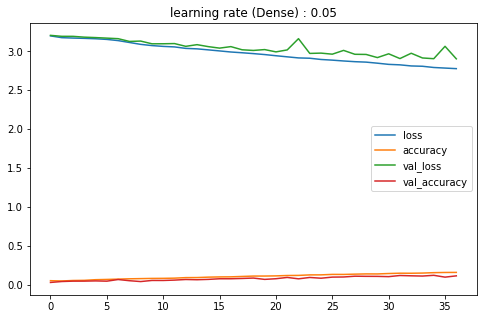

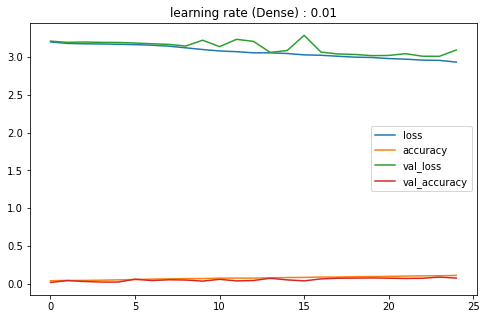

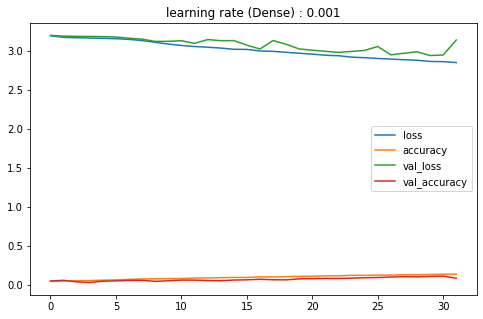

In [ ]:
history_arr = optimise_best_learning_rate_Dense()

##### Exp7 : DNN - Activation function

In [ ]:
def optimise_activation_function_Dense():
  parameters = ['elu', 'selu', 'relu', 'tanh', 'sigmoid'] #activation functions

  results_arr = []

  for param in parameters:
    hiddensizes = [16, 64, 128, 256]
    actfn = param
    optimizer = keras.optimizers.SGD
    learning_rate = 0.05 
    batch_size = 64
    n_epochs = 50
    title = f'Activation Function (Dense) : {param}'

    history = run_Dense(title, hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback)

    results_arr.append([param,history.history['val_accuracy'][-1]])

    history_arr = []
    history_arr.append(history.history)    
  
  val_accuracy_arr = []
  best_result = []

  print('All results')
  print('-----------')
  for result in results_arr:
    print(result)
    val_accuracy_arr.append(result[1])

  print(f'\nBest val_accuracy : {max(val_accuracy_arr)}' )

  for result in results_arr:
    if result[1] == max(val_accuracy_arr):
      best_result = result[0]

  print(f'\nBest result : {best_result}' )

  return history_arr


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 16)                12560     
                                                                 
 dense_62 (Dense)            (None, 64)                1088      
                                                                 
 dense_63 (Dense)            (None, 128)               8320      
                                                                 
 dense_64 (Dense)            (None, 256)               33024     
                                                                 
 dense_65 (Dense)            (None, 25)                6425      
                                                                 
Total params: 61,417
Trainable params: 61,417
Non-tra

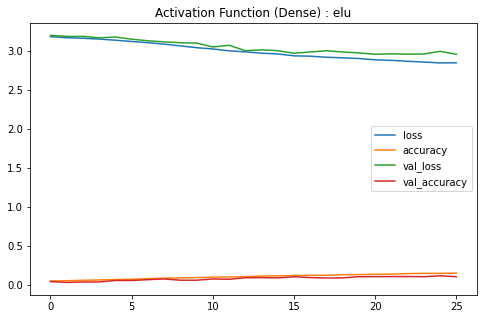

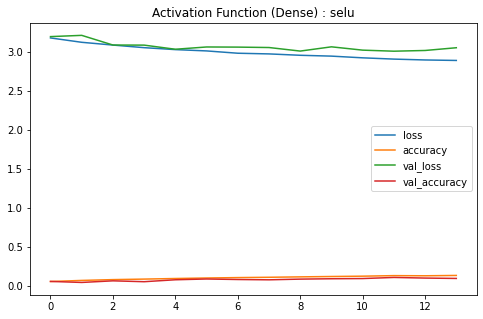

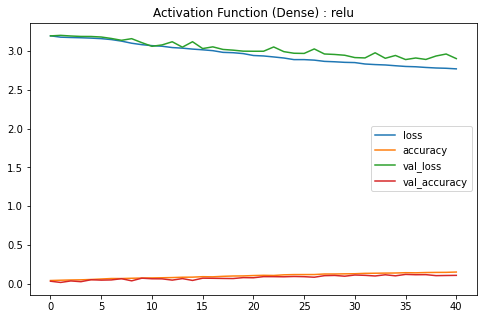

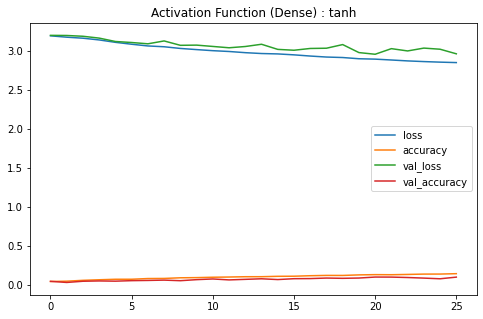

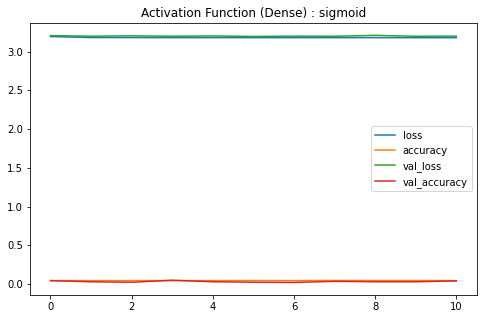

In [ ]:
history_arr = optimise_activation_function_Dense()

##### Exp8 : DNN - Optimizer

In [ ]:
def optimise_optimizer_Dense():
  parameters = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adam, keras.optimizers.Adamax, keras.optimizers.Nadam] #optimizers

  results_arr = []

  for param in parameters:
    hiddensizes = [16, 64, 128, 256]
    actfn = 'elu'
    optimizer = param
    learning_rate = 0.05 
    batch_size = 64
    n_epochs = 50
    title = f'Optimizer (Dense) : {param}'

    history = run_Dense(title, hiddensizes, actfn, optimizer, learning_rate,n_epochs,batch_size,early_stop_callback)

    results_arr.append([param,history.history['val_accuracy'][-1]])

    history_arr = []
    history_arr.append(history.history)
  
  val_accuracy_arr = []
  best_result = []

  print('All results')
  print('-----------')
  for result in results_arr:
    print(result)
    val_accuracy_arr.append(result[1])

  print(f'\nBest val_accuracy : {max(val_accuracy_arr)}' )

  for result in results_arr:
    if result[1] == max(val_accuracy_arr):
      best_result = result[0]

  print(f'\nBest result : {best_result}' )

  return history_arr


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_33 (Flatten)        (None, 784)               0         
                                                                 
 dense_86 (Dense)            (None, 16)                12560     
                                                                 
 dense_87 (Dense)            (None, 64)                1088      
                                                                 
 dense_88 (Dense)            (None, 128)               8320      
                                                                 
 dense_89 (Dense)            (None, 256)               33024     
                                                                 
 dense_90 (Dense)            (None, 25)                6425      
                                                                 
Total params: 61,417
Trainable params: 61,417
Non-tra

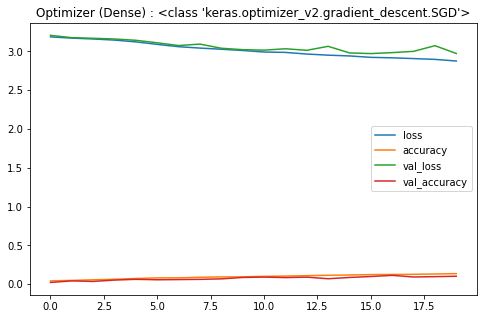

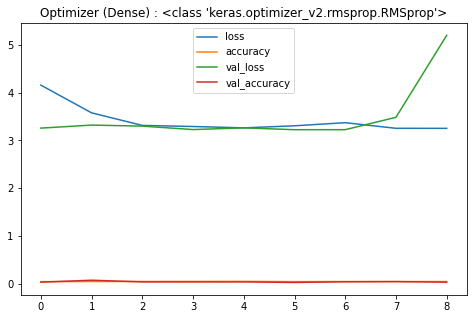

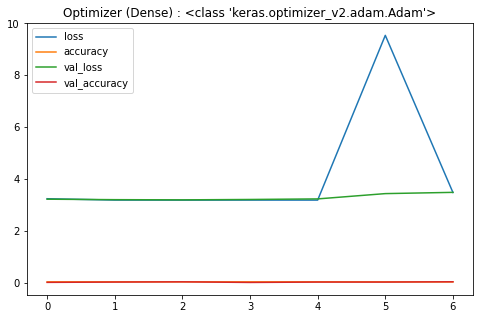

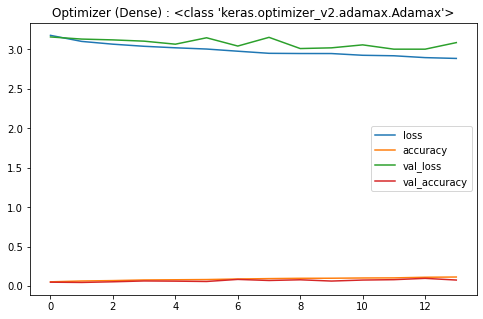

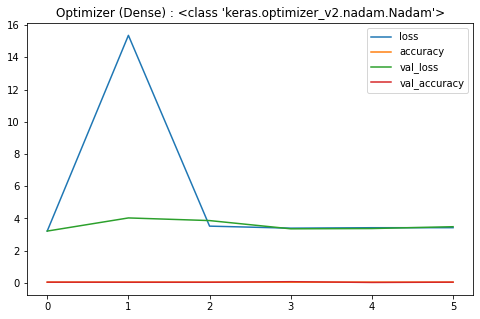

In [ ]:
history_arr = optimise_optimizer_Dense()

## 7. Select and Test Model

We've selected the CNN model as current optimisations don't appear to be working with the Dense model.

### Retrain model using optimised parameters

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 3, 3, 128)      

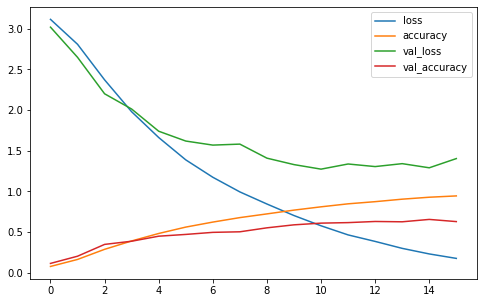

In [ ]:
early_stop_callback = EarlyStopping(monitor='val_loss',patience=5, min_delta=0.01, mode='auto', verbose=0,restore_best_weights=True)

hiddensizes = [16, 64, 128, 256]
actfn = 'elu'
optimizer = keras.optimizers.SGD
learning_rate = 0.05 
batch_size = 64
n_epochs = 50

#Define the model
model_prod = model_cnn_factory(hiddensizes, actfn, optimizer, learning_rate)

#Fit the model
history_prod = model_prod.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test),verbose=0, callbacks=[early_stop_callback])

#Display the model summary
pd.DataFrame(history_prod.history).plot(figsize=(8, 5))

#Print a summary of the final results
print(f"Summary\n-----------\nepochs : {len(history_prod.history['val_accuracy'])}\naccuracy : {history_prod.history['accuracy'][-1]}\nloss : {history_prod.history['loss'][-1]}\ntest_accuracy : {history_prod.history['val_accuracy'][-1]}\ntest_loss : {history_prod.history['val_loss'][-1]}")

## 8. Results

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model_prod.predict(X_test)

#Compare output of predictions

result = ''
pass_counter = 0
fail_counter = 0

alphabet_accuracy_dict ={0:[0,0],1:[0,0],2:[0,0],3:[0,0],4:[0,0],5:[0,0],6:[0,0],7:[0,0],8:[0,0],9:[0,0],10:[0,0],11:[0,0],12:[0,0],13:[0,0],14:[0,0],15:[0,0],16:[0,0],17:[0,0],18:[0,0],19:[0,0],20:[0,0],21:[0,0],22:[0,0],23:[0,0],24:[0,0],25:[0,0]}

alphabet = list(string.ascii_uppercase)

error_dict = {}

for i, y_test_prediction in enumerate(y_test_pred):
  index = np.where(y_test_pred[i]==y_test_pred[i].max())

  if alphabet[y_test[i]] == alphabet[index[0][0]]:
    result = 1
    pass_counter+=1
  else:
    result = 0
    fail_counter+=1

    key = alphabet[y_test[i]]+alphabet[index[0][0]]                            

    if key in error_dict:
      error_dict[key]+=1
    else:
      error_dict[key]=0

  alphabet_accuracy_dict[y_test[i]][0]+=result 
  alphabet_accuracy_dict[y_test[i]][1]+=1 

  # print(f'{i} | Expected : {alphabet[y_test[i]]}, Predicted : {alphabet[index[0][0]]}, Result : {result}')


### Overal model accuracy

In [ ]:
print(f'Overall Accuracy = {(pass_counter/(pass_counter+fail_counter))*100}%')

Overall Accuracy = 60.903513664249864%


### Accuracy for each individual letter

In [ ]:
accuracy_dict = {}

print('Accuracy for each letter')
print('------------------------')
for i in range(25):
  try:
    accuracy = round(alphabet_accuracy_dict[i][0]/alphabet_accuracy_dict[i][1],2)
    print(f'{alphabet[i]} : {accuracy}')
    accuracy_dict[alphabet[i]] = accuracy
  except:
    pass



Accuracy for each letter
------------------------
A : 0.81
B : 0.68
C : 0.81
D : 0.58
E : 0.57
F : 0.7
G : 0.83
H : 0.68
I : 0.68
K : 0.28
L : 0.7
M : 0.39
N : 0.43
O : 0.61
P : 0.91
Q : 0.79
R : 0.39
S : 0.54
T : 0.4
U : 0.49
V : 0.5
W : 0.61
X : 0.59
Y : 0.54


### Letter with lowest accuracy

In [ ]:
print('\nLetter with lowest accuracy')
print('---------------------------')
print(min(accuracy_dict, key=accuracy_dict.get))


Letter with lowest accuracy
---------------------------
K


### Most Common Error

In [ ]:
print('\nMost common error ')
print('---------------------------')
print(f'{max(error_dict, key=error_dict.get)[0]} mistaken for {max(error_dict, key=error_dict.get)[1]}')


Most common error 
---------------------------
E mistaken for S


# Conclusions and Recommendation

The current model has an about 60 percent accuracy when applied to the Test data, which is consistent with the results of the validation data. 

The difference in performance between the training and test data may suggest that the model is overfitting to the training data, however other issues that could be contributing to the poor accuracy of the model may include :

* Significant differences in the images used for training and testing leading to poor representation of test images in training data set
* Insufficient variations of hand signs in training data leading to over learning particular hand attributes for specific letters and weakened ability to generalise
* Poor model definition - the model may have been too simple
* Poor model optimisation - selected hyperparameters may not have been the optimal choices

For future experiments, we may want to add regularisation to help the model generalise more to the test data if the problem is mainly due to overfitting. 

With further model development and optimisation, I believe the model could be improved to a higher level of accuracy. 